In [1]:
%run common-imports.ipynb

#  Dataset-5


## Prerequisites

prior notebooks:

* Notebook 1: `univariate-1.ipynb`
* Notebook 2: `dataset-2.ipynb`
* Notebook 3: `dataset-3.ipynb`
* Notebook 4: `univariate-2.ipynb`
* Notebook 5: `univariate-3.ipynb`
* Notebook 6: `dataset-4.ipynb`


## Lab Goals

* will explore this data, observe its statistical characteristics, visualize it.
* will take a systematic approach to build  linear and polynomial regression models to make prediction on the data. 

## Outcome

This lab dealing with polynomial regression, and under its limitations when dealing with data more appropriately modeled with transcendental functions.

In [2]:
#source = 'https://raw.githubusercontent.com/'
data = pd.read_csv("../datasets/dataset-5.csv")

In [3]:
data.sample(5)

,x,y
6252,9.541218,0.202160
4684,9.348196,0.218139
1731,0.551262,1.046148
4742,1.020358,1.531527
4521,0.275044,0.599263


#### Descriptive statistics


In [4]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,10000.0,4.944755,2.863460,0.002700,2.463689,4.915809,7.399909,9.999281
y,10000.0,0.975080,0.571116,0.006741,0.430866,0.912415,1.539281,1.839397


#### Missing Values Analysis


In [5]:
data.isnull().sum()

x    0
y    0
dtype: int64

 From the above results, no missing values at all. we don't address this issue.

#### Pandas Profiling

In [6]:
# data.profile_report()

## Data Visualization

### Plotting using matplotlib

Observe that the data distinctly exhibits nonlinearity of relationship between $x$ and $y$. **what the correlation is between the variables?** 

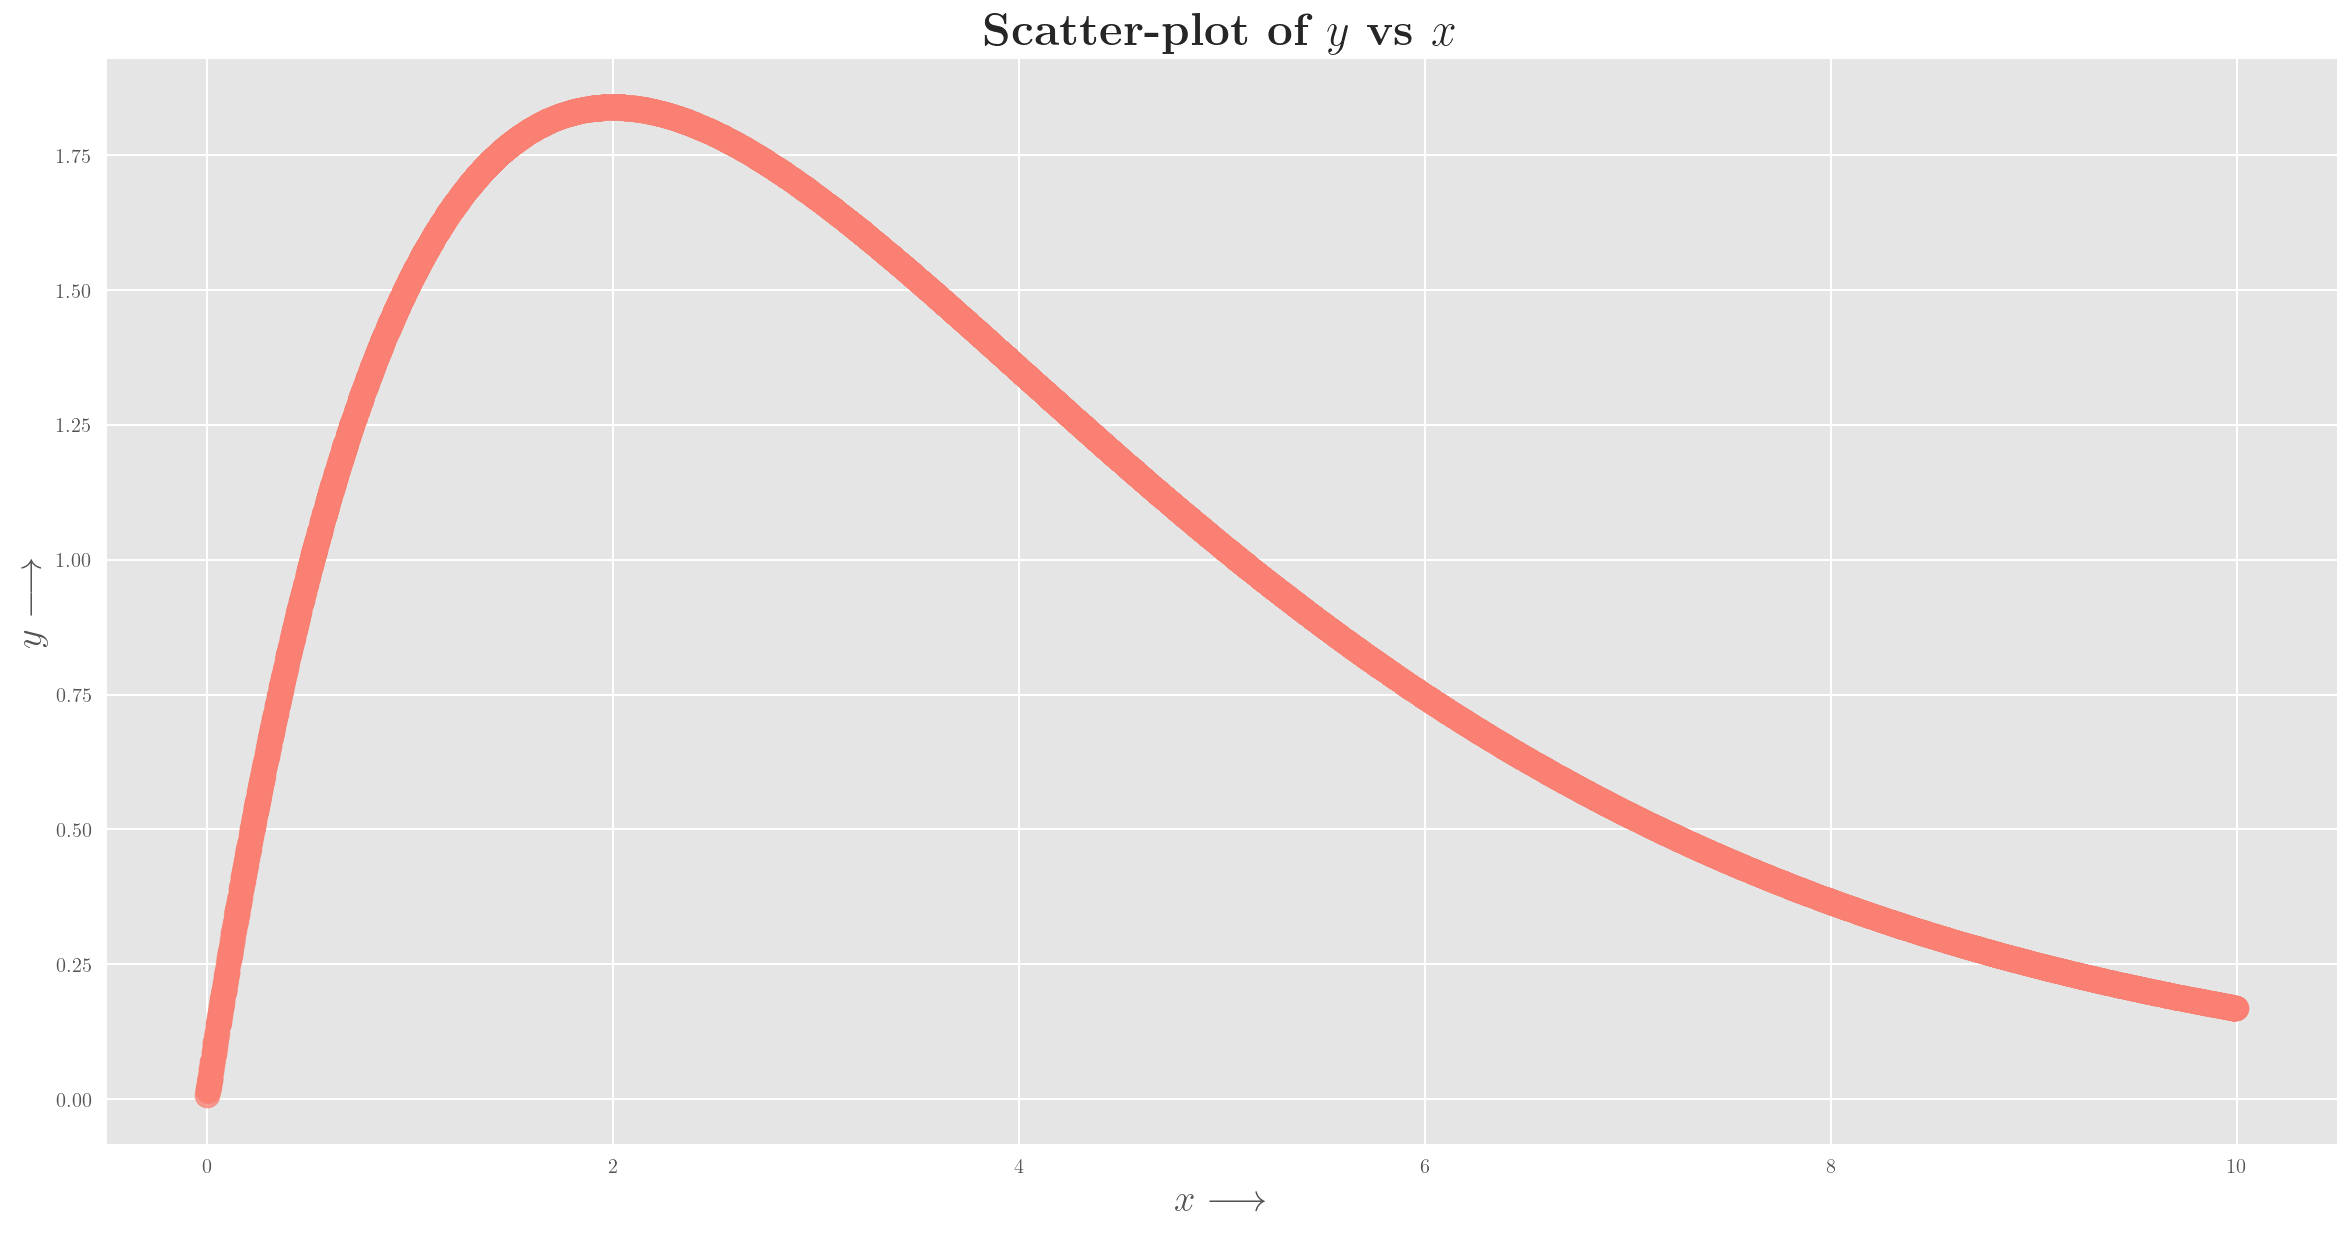

In [7]:
plt.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

# Regression

From the figure above, it is apparent that a simple linear regression model is unlikely to work. However, let us first build a simple linear regression model for this dataset, in order to get a baseline performance.

As usual, we will first separate out the predictor from the target, and then split the data into a training and test set.

In [8]:
X, y = data[['x']], data['y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

Observe that we have called the predictor dataframe as `X` (note the capitalization), and the target as simply the array of values: `y`. While we could have named the variables anything, it is a well established practice in python based data science notebooks to follow this particular naming convention. It makes is much easier for other data scientists to read a notebook if it follows the well established naming conventions.

## Split the data into test and train subsets

In order to know how good at predicting are the regression models we will build, we need to take a subset of the data, and sort of "hide it under the pillow", and not allow the algorithm to see it during the training process. Then we can check if the model is making good predictions by comparing the said predictions against the actual target values.

Once again, observe how we follow the well established naming conventions for the training and test subsets of the data:


## Build a linear regression model

Let us now build a regression model, and fit it to the dataset. For this, we instantiate a `LinearRegression` object named `model` using the constructor. Then we fit the `model` to the available training dataset.

In [10]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [11]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: 1.7711852235155838, Slope: [-0.15990193]


Look back at the data visualization, and see if this agrees with your own estimates.

## Predictions from the model

Now, let us use the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, will get a sense of how well the model has learned to generalize from the data. 


In [12]:
yhat = model.predict(X_test)
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 0.12
Coefficient of Determination (R^2):0.6161335362432641


The coefficient of determination, $R^2$ indicates a dismal model! Should we plod on to the next step of model verification: namely the residual analysis.

## Residual Analysis

will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

will use the `yellowbrick` library for looking at the model characteristics.

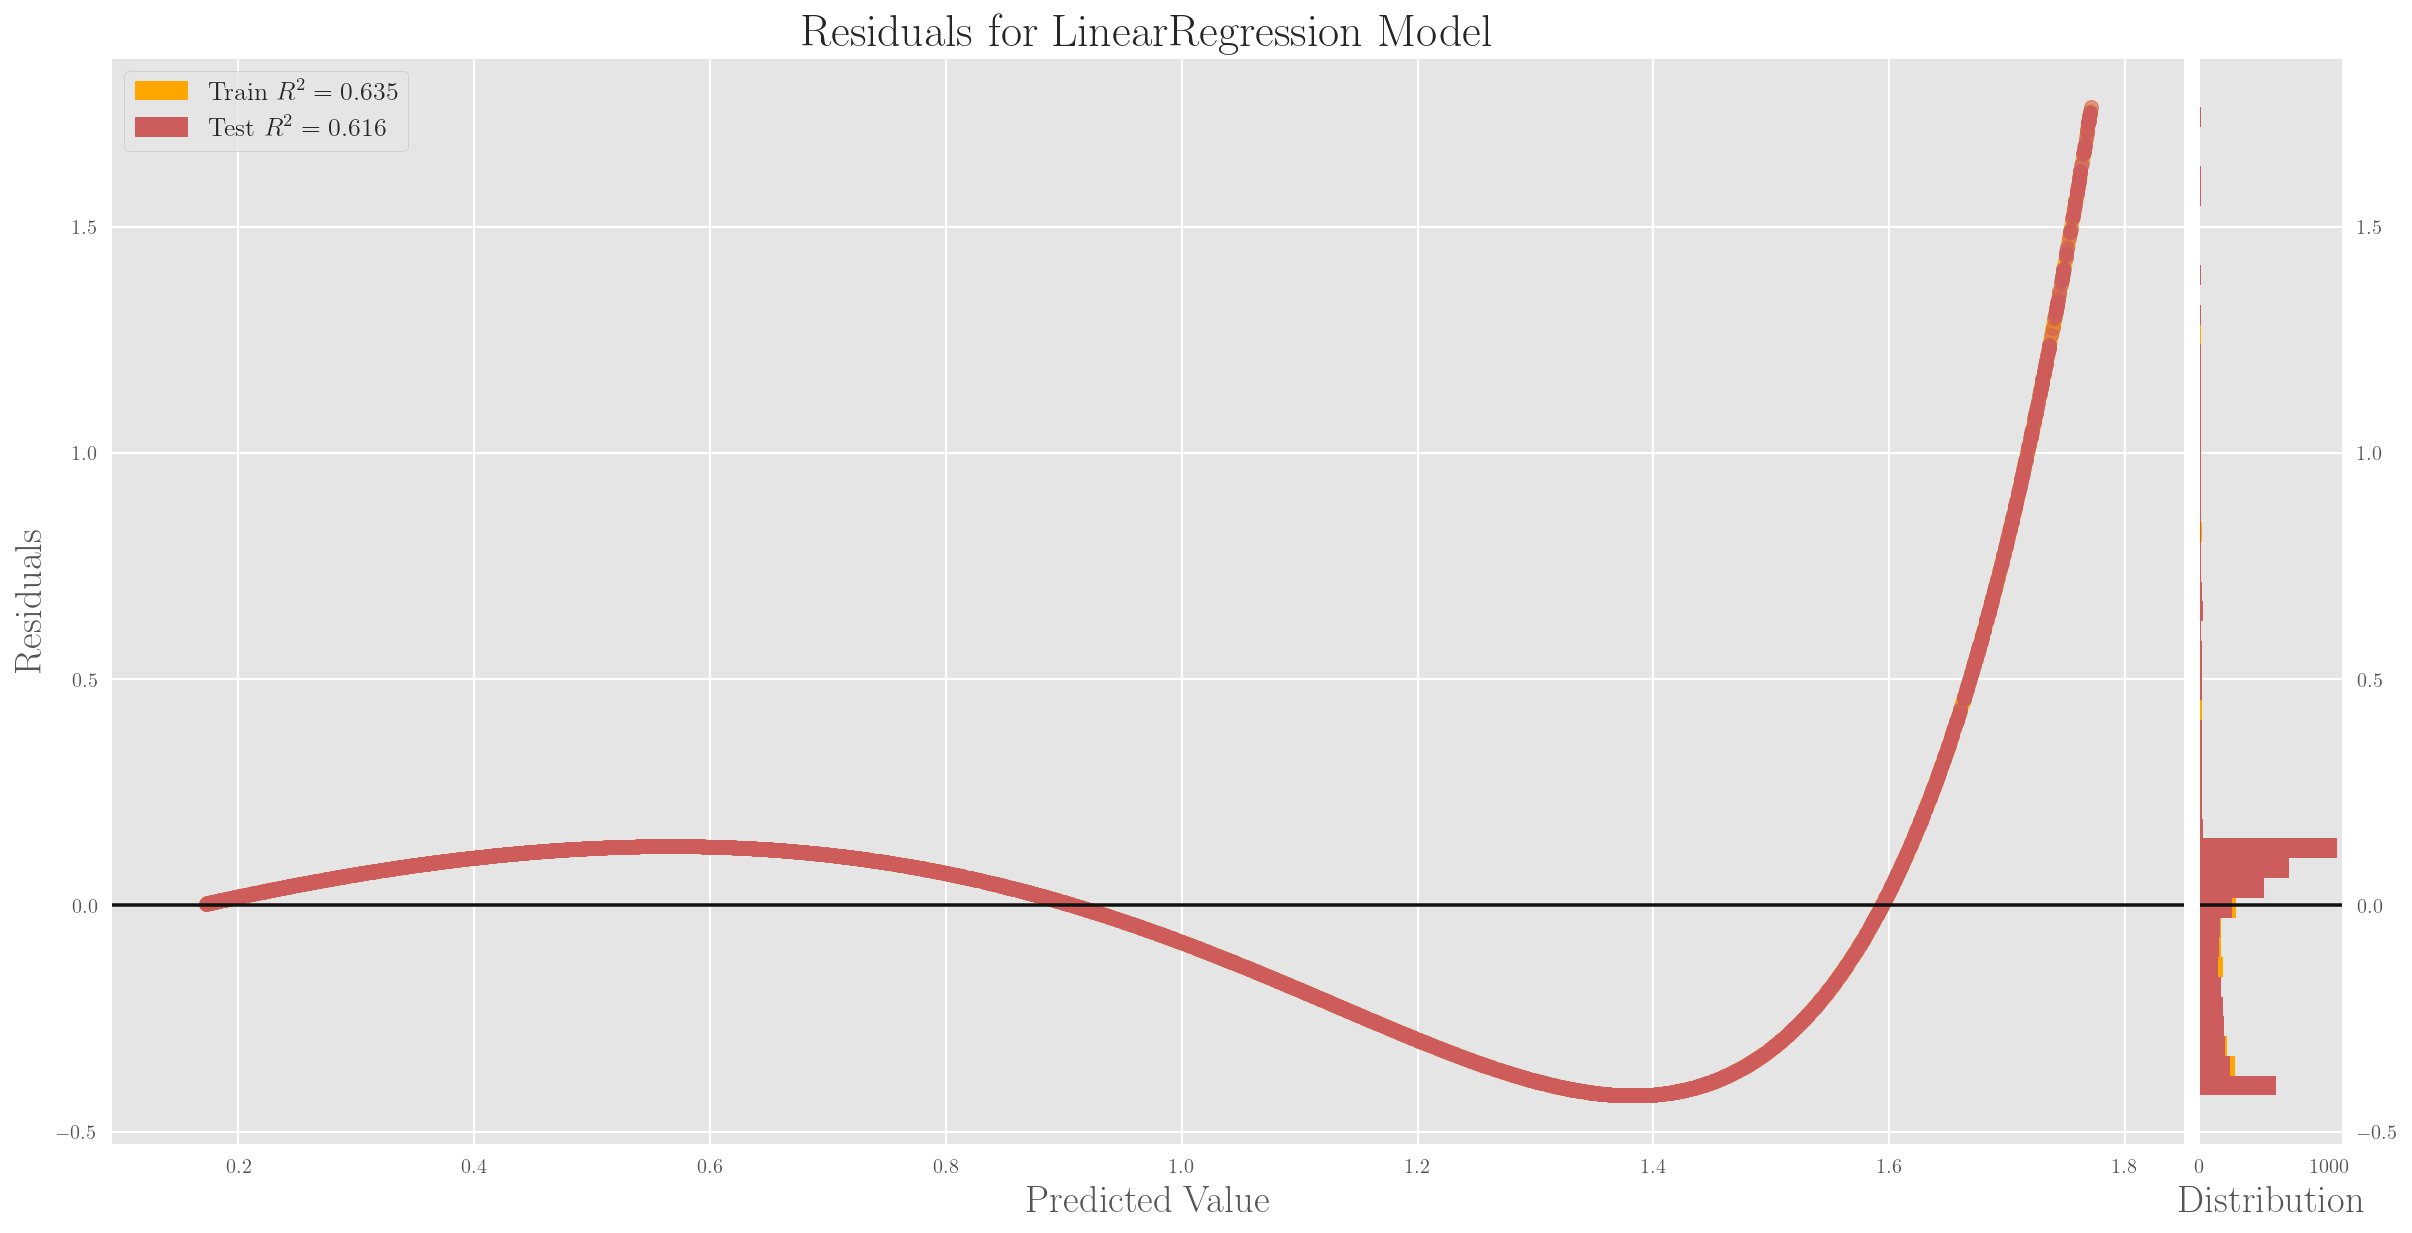

In [13]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals display a striking pattern! The presence of a pattern in the residuals in a clear indication that the model has failed to capture some essential characteristics of the relationship between $x$ and $y$.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [14]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(X)

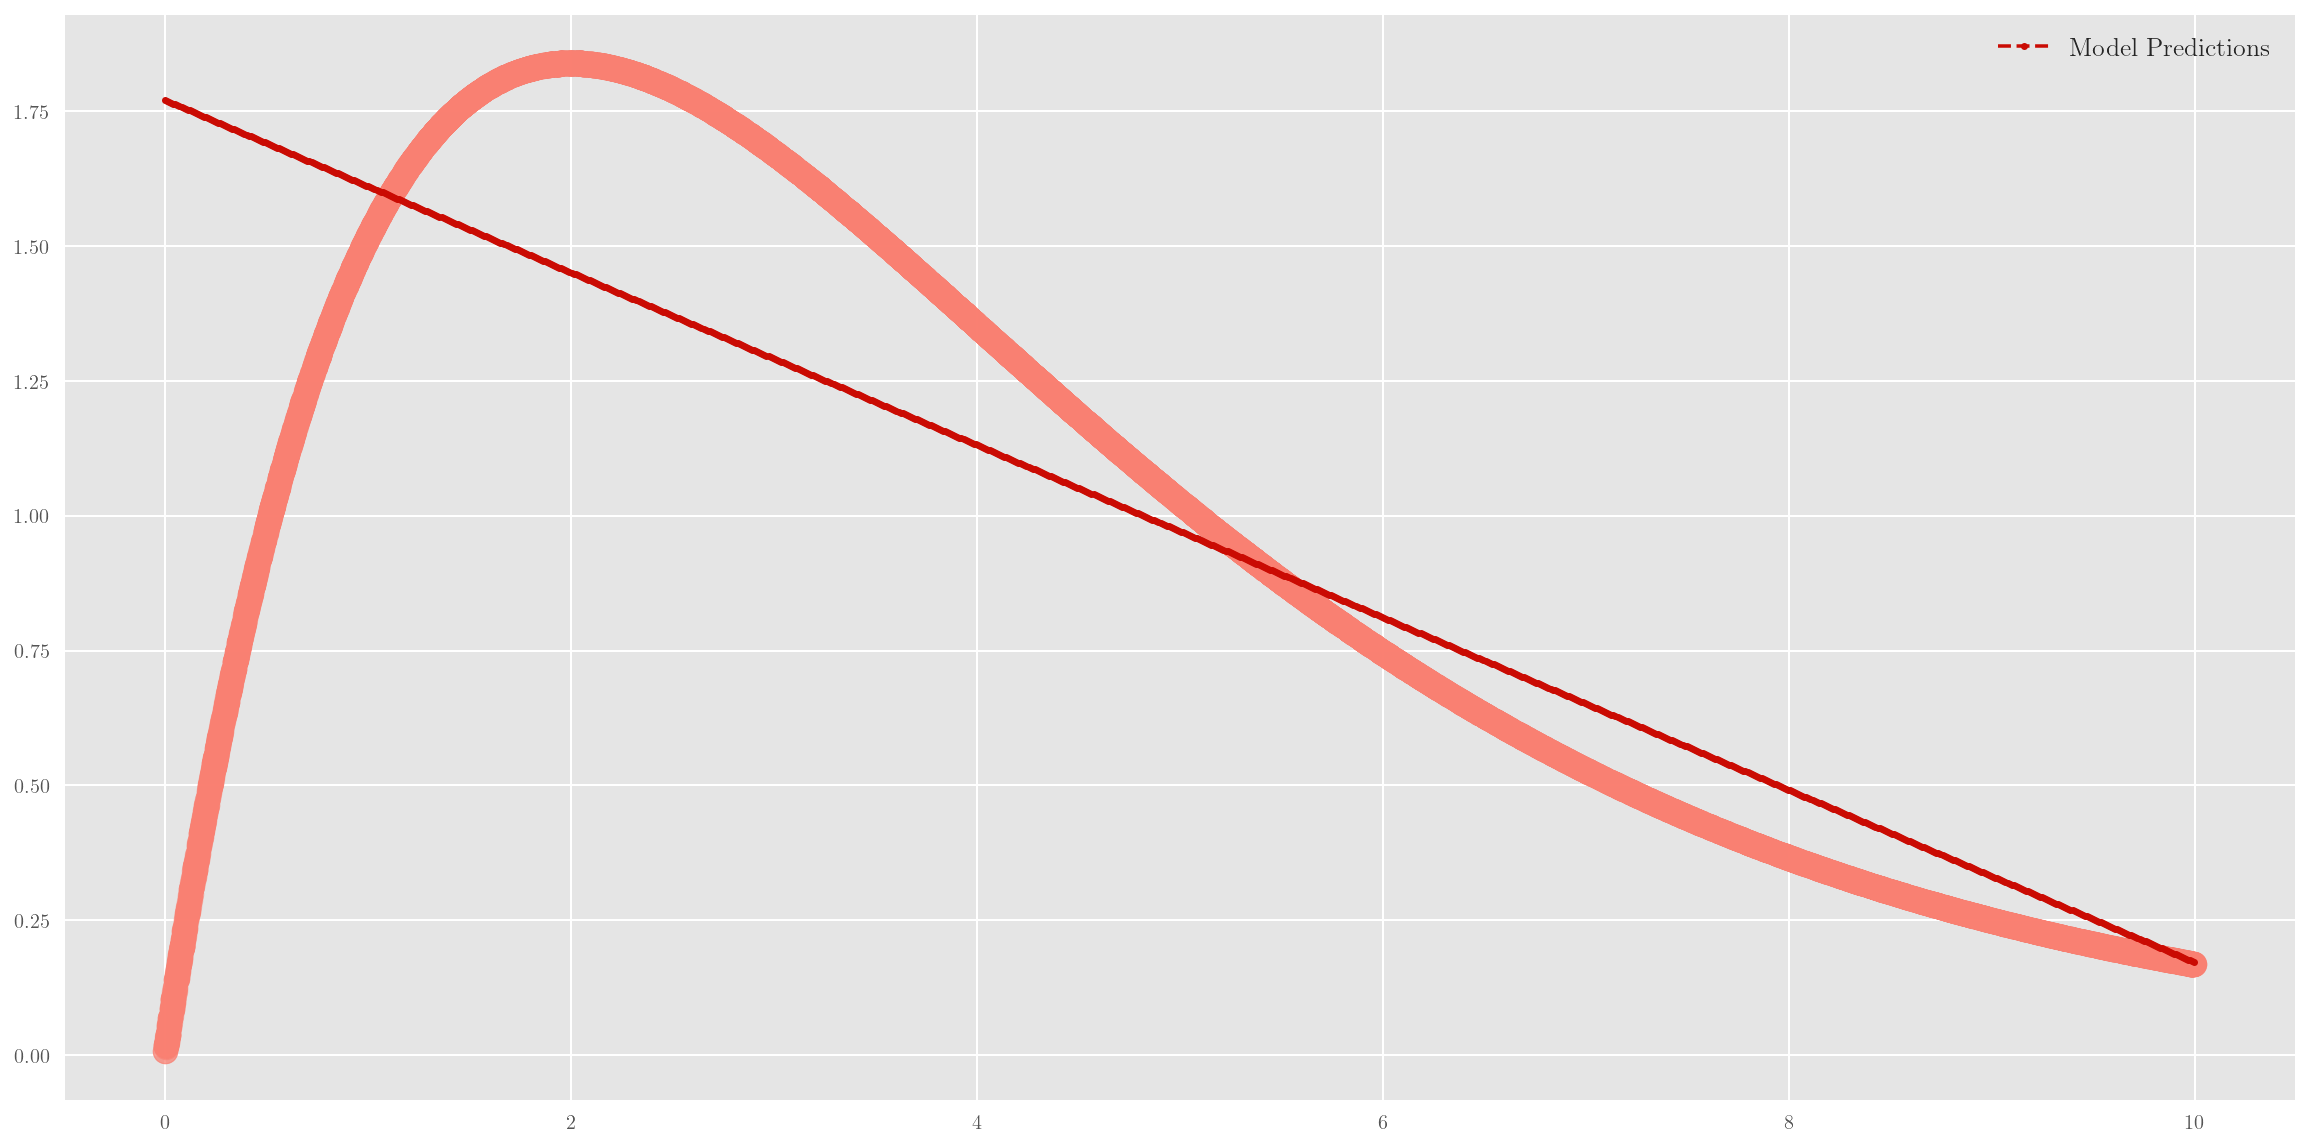

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

This simple linear model has, as one would have expected by now, failed terribly!

##### Polynomial Regression

from the prior notebooks adding polynomial features to the dataset, and then performing the regression can be an effective tool. 

**since we observe 5 distinct bends in the data, we should expect a polynomial of degree no less than 6 to fit the data.** With some experimentation, we find that a polynomial of degree 6 proves reasonably effective.

merged the steps of:
* create polynomial degrees of the input
* fit a linear model to the data
* make predictions on test data
* print model diagnostics

In [16]:
degree     = 6
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [ 0.00000000e+00  2.41758892e+00 -1.13045501e+00  2.37878473e-01
 -2.73961903e-02  1.67614403e-03 -4.25161284e-05]
Mean squared error: 0.00
Coefficient of Determination (R^2):0.9999743750656844


The coefficient of determination seems astonishingly good! Let us now proceed with the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

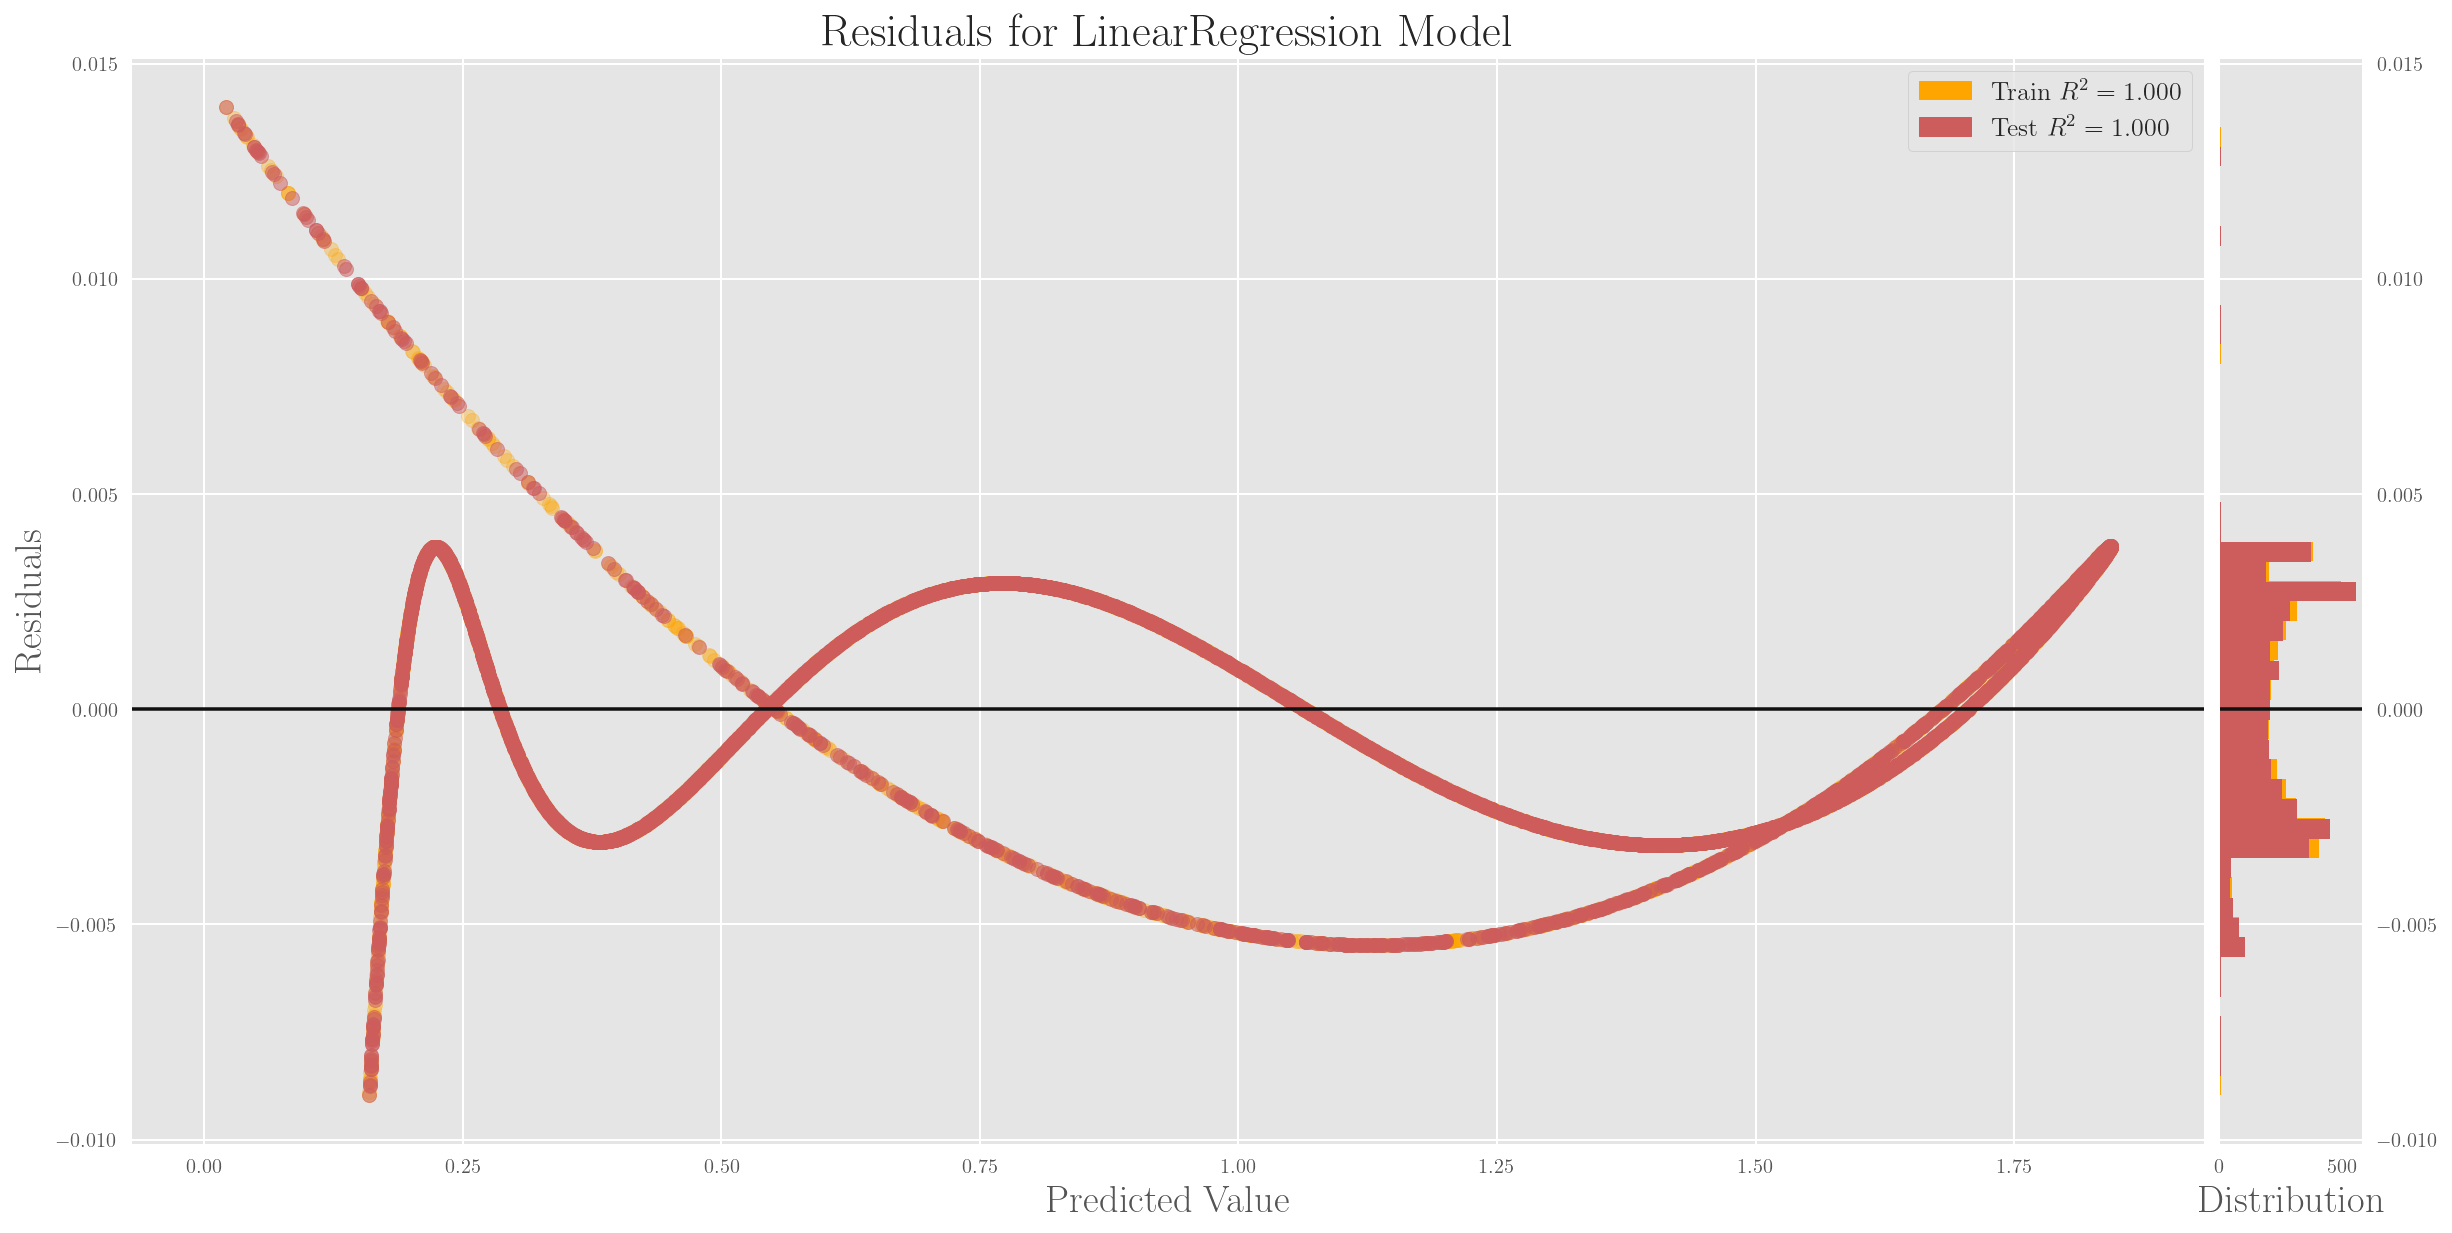

In [17]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

Despite the excellent coefficient of determination, the figure above shows a distinct pattern in the residual, clearly indicative of the fact that the polynomial model is perhaps not representative of the underlying data.

The y-axis range range of the residuals are practically zero.

## Visualization of the model predictions

let's visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

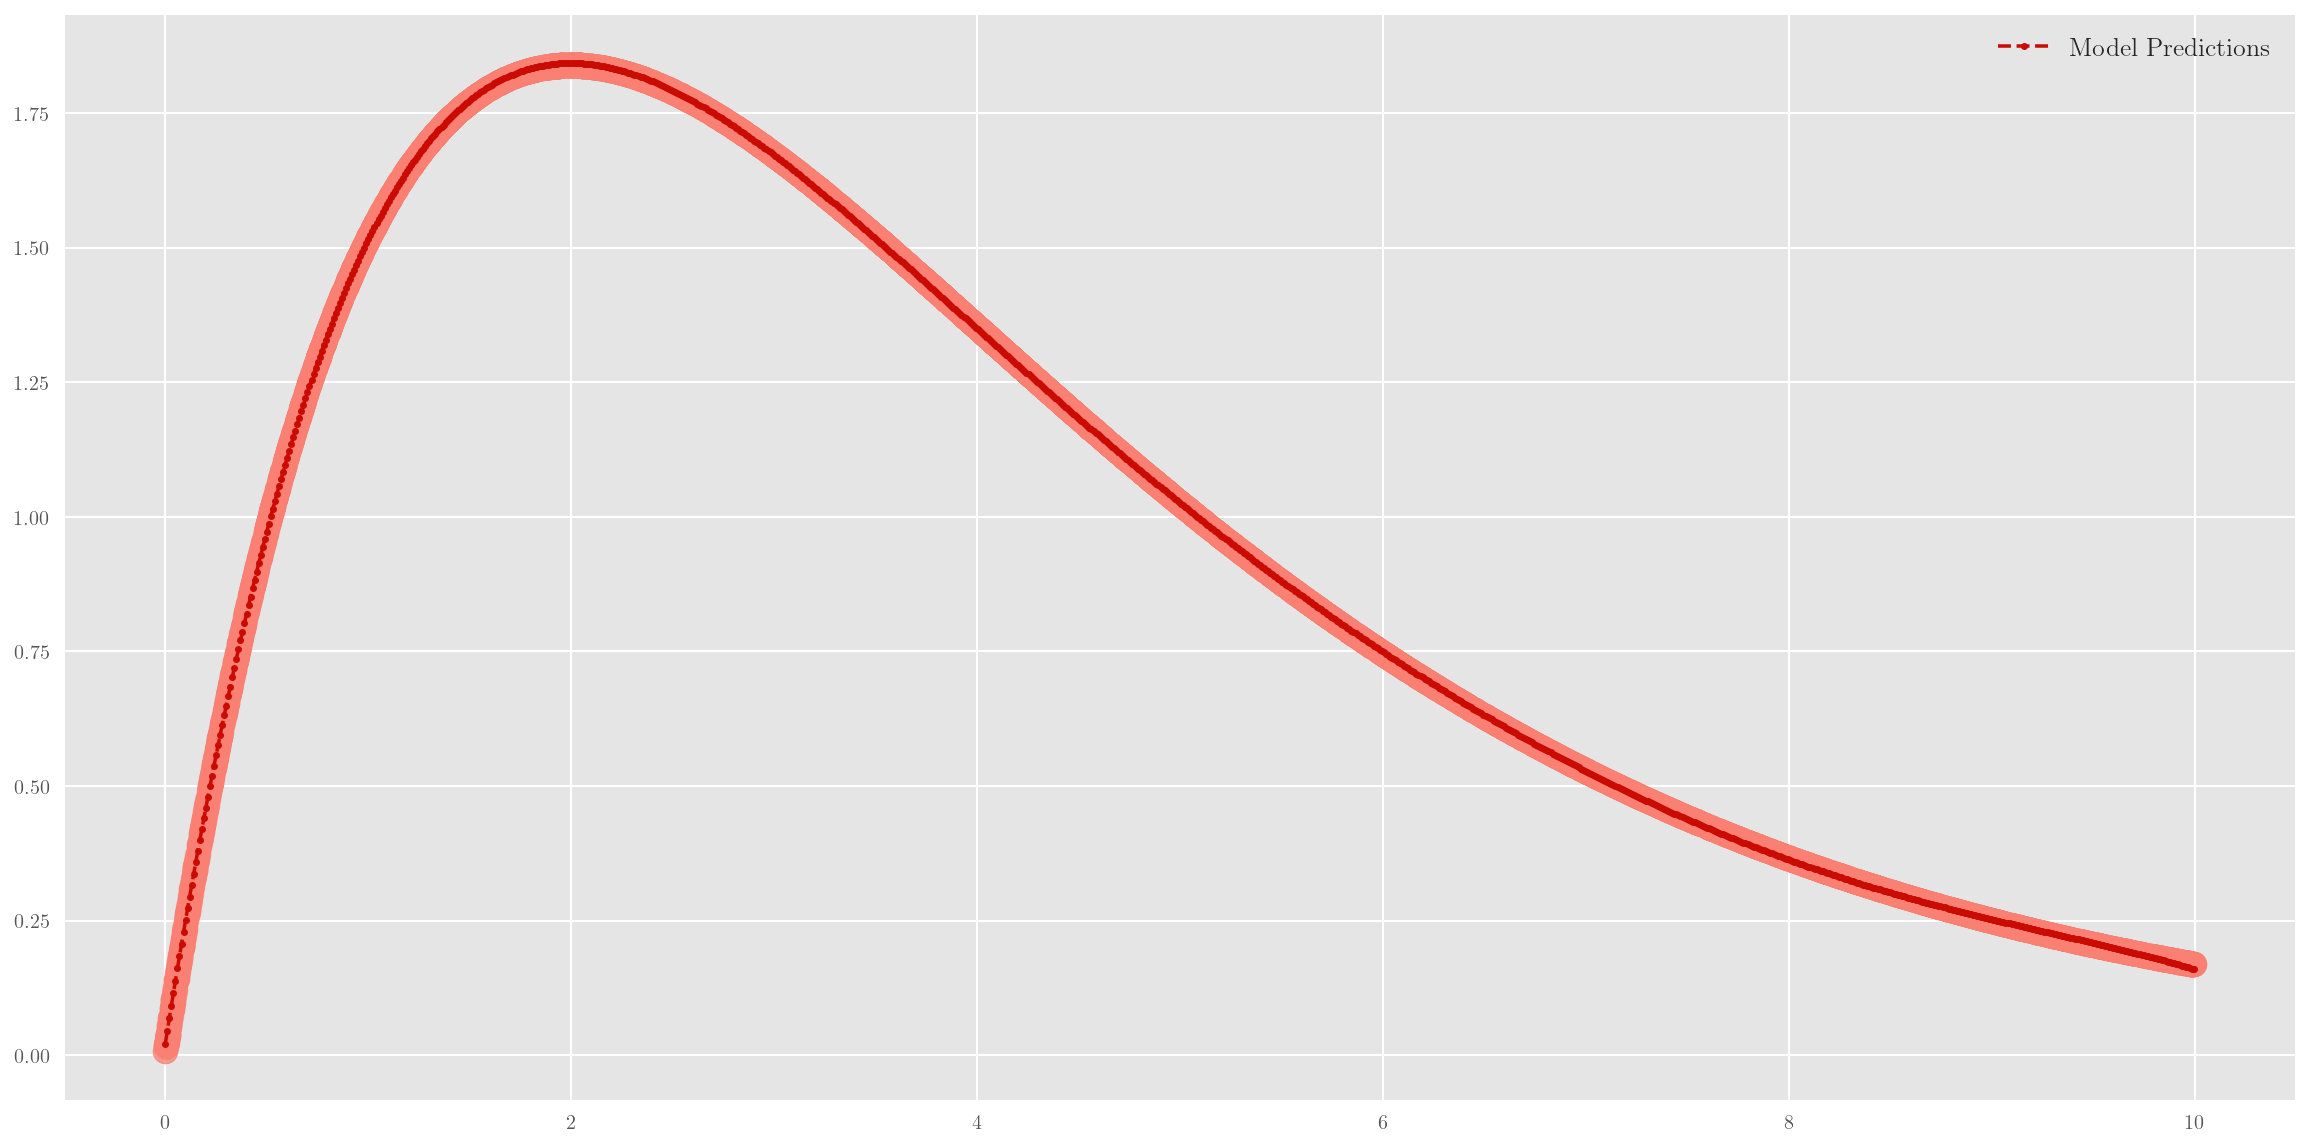

In [18]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(polynomial.transform(X))

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

The model predictions agree exceedingly well with the data! From this we conlude that this is indeed an effective model: though it may not have captured well the underlying generative force, it is a fairly effective approximation.

when there are some patterns in the residuals, consider this a very effective model for the following reasons:

* the coefficient of determination is excellent
* the actual residuals are vanishingly small
* the model predictions when visualized over the data show a high degree of fidelity.

# Conclusion

For this dataset, polynomial regression has proved reasonably effective. keep the polynomial to six or so, we do not see pronounced Runge's phenomenon. However, besyond that, the oscillations at the periphery begin to get pronounced.

Even the model the data with a very high degree polynomial, there are still very small residuals but with a pronounced pattern in the residual plot. This leads us to believe that this data was generated with some transcendental functions involved.

(Indeed, it so happens that this data was generated with a Gamma function, which is a transcendental.)
